In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('data/micro_jpg/stalled/100109/frame0.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))

mask = cv2.bitwise_or(mask1, mask2)

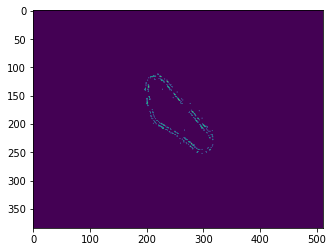

In [4]:
plt.imshow(mask)
plt.show()

In [6]:
path2img = 'data/sample_image/micro_jpg_stalled_mask_frame0.jpg'
frame = mask
cv2.imwrite(path2img, frame)

True

In [7]:
x,y,w,h = cv2.boundingRect(mask)
mask_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

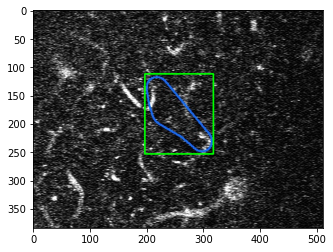

In [8]:
plt.imshow(mask_img)
plt.show()

In [9]:
path2img = 'data/sample_image/micro_jpg_stalled_bbox_frame0.jpg'
frame = mask_img
cv2.imwrite(path2img, frame)

True

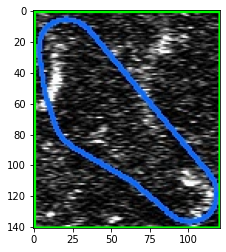

In [8]:
roi = img[y:y+h, x:x+w]
plt.imshow(roi)
plt.show()

In [196]:
def get_bbox(path2img):
    ## Read and merge
    img = cv2.imread(path2img)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ## Gen lower mask (0-5) and upper mask (175-180) of RED
    mask1 = cv2.inRange(img_hsv, (0,50,20), (5,255,255))
    mask2 = cv2.inRange(img_hsv, (175,50,20), (180,255,255))

    ## Merge the mask and crop the red regions
    mask = cv2.bitwise_or(mask1, mask2)

    ## Get bounding box over mask region
    x,y,w,h = cv2.boundingRect(mask)
    return x,y,w,h

def save_crop_img(path2img, x, y, w, h, path2store):
    img = cv2.imread(path2img)

    ## Crop bounding box and save region of interest
    roi = img[y:y+h, x:x+w]
    cv2.imwrite(path2store, roi)

In [284]:
extension = ".jpg"
path2data = "data"
sub_folder_jpg = "test_jpg" # "micro_jpg"
new_sub_folder = "test_jpg_crop" # "micro_jpg_crop"
path2ajpgs = os.path.join(path2data, sub_folder_jpg)
os.makedirs(os.path.join(path2data, new_sub_folder), exist_ok=True)

for root, dirs, files in os.walk(path2ajpgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2img = os.path.join(root, name)
        path2store = path2img.replace(sub_folder_jpg, new_sub_folder)
        path2create = path2store.replace(name, "")
        os.makedirs(path2create, exist_ok= True)        
        if name == 'frame0.jpg':
            x,y,w,h = get_bbox(path2img)
        save_crop_img(path2img, x, y, w, h, path2store)